['00000001']


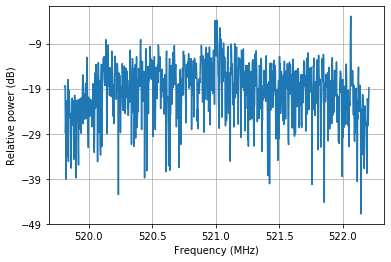

In [1]:
from rtlsdr import RtlSdr  

import numpy as np  
import scipy.signal as signal

import matplotlib  
matplotlib.use('Agg') # necessary for headless mode  
# see http://stackoverflow.com/a/3054314/3524528
import matplotlib.pyplot as plt


from pylab import *
%matplotlib inline

from rtlsdr import RtlSdr

# Get a list of detected device serial numbers (str)
serial_numbers = RtlSdr.get_device_serial_addresses()
print(serial_numbers)


# Find the device index for a given serial number
device_index = RtlSdr.get_device_index_by_serial(serial_numbers[0])

sdr = RtlSdr(device_index)
# configure device
sdr.sample_rate = 2.4e6
sdr.center_freq = 521.01e6
sdr.gain = 4

samples = sdr.read_samples(1024)
sdr.close()

# use matplotlib to estimate and plot the PSD
psd(samples, NFFT=1024, Fs=sdr.sample_rate/1e6, Fc=sdr.center_freq/1e6)
xlabel('Frequency (MHz)')
ylabel('Relative power (dB)')

show()

# Or pass the serial number directly:
#sdr = RtlSdr(serial_number='00000001')